## HITS

In [ ]:
import operator

%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

import networkx as nx
from networkx.algorithms import community

In [52]:
def sort_by_value(dict_):
    return sorted(dict_.items(), key=operator.itemgetter(1), reverse=True)


def head(dict_):
    items = sort_by_value(dict_)[10:5000]
    keys, _ = zip(*items)
    return keys, dict(items)


def plot_against_degree(cent, background=None):
    if background is None:
        background = nx.degree_centrality(G)
    ws_dg, dgr = head(background)
    ws_bt, btw = head(cent)
    ws = [w for w in ws_dg if w in ws_bt]
    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(
        [dgr[wd] for wd in ws],
        [btw[wd] for wd in ws])
    for wd in ws:
        if dgr[wd] > .0025 or random.random() < .1:
                plt.annotate(wd, (dgr[wd], btw[wd]))
    wd = 'tud'                
    plt.annotate(wd, (dgr[wd], btw[wd]), color='r')

In [33]:
G = nx.read_gpickle('/mnt/permanent/home/makrai/project/TextBetweenness/mnsz_10k-sent.gpickle')

In [34]:
logging.info('')
hubs, auths = nx.algorithms.link_analysis.hits(G)
logging.info('')

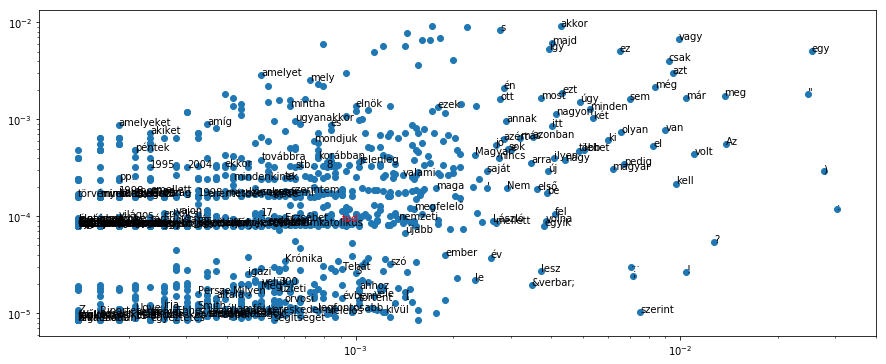

In [53]:
plot_against_degree(auths)